In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)


In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head(10)
train_df['species'].value_counts()[:20]
print(train_df.shape)

(990, 194)


In [4]:
test_df =pd.read_csv("test.csv")
test_df.head(10)
print(test_df.shape)
print(test_df.info())


(594, 193)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.7 KB
None


In [5]:
train_df.isnull().sum().sum()
test_df.isnull().sum().sum()

0

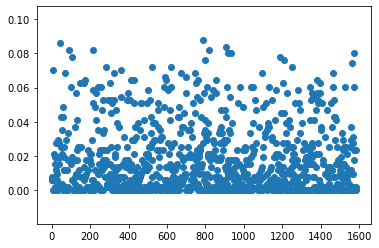

In [6]:
_= plt.scatter(train_df['id'],train_df['margin1'])

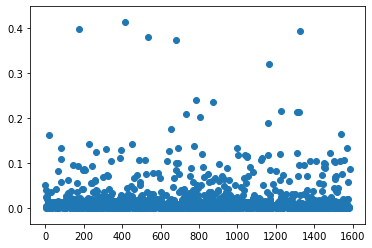

In [7]:
_=plt.scatter(train_df['id'],train_df['texture1'])


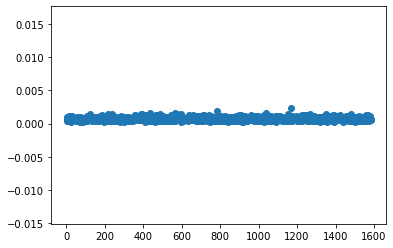

In [8]:
_=plt.scatter(train_df['id'],train_df['shape1'])


In [9]:
def encode(train_df, test_df):
    le = LabelEncoder().fit(train_df.species)
    labels = le.transform(train_df.species)   #encode species strings
    classes = list(le.classes_)
    test_ids = test_df.id
    
    
    train_df = train_df.drop(["species" , "id"] , axis = 1)
    test_df =test_df.drop(["id"], axis =1)
    
    return train_df, labels, test_df, test_ids, classes

In [10]:
train_df, labels, test_df, test_ids, classes = encode(train_df, test_df)
train_df.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [11]:
X = train_df.values
y = labels
print(X.shape)
print(y.shape)

(990, 192)
(990,)


In [12]:
sss = StratifiedShuffleSplit(test_size = 0.2, random_state= 8)
sss.get_n_splits(X, y)

10

In [13]:
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]

print(X_train.shape)
print(y_train.shape)

(792, 192)
(792,)


In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.sqrt(X_train))
scaled_test_data = scaler.transform(np.sqrt(X_test))


In [17]:
classifiers_exp = [
    KNeighborsClassifier(3,n_jobs= -1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [18]:
for clf in classifiers_exp:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    

    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 91.4141%
Log Loss: 1.231916318537354
DecisionTreeClassifier
****Results****
Accuracy: 68.6869%
Log Loss: 10.81517240648728


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 85.8586%
Log Loss: 1.3191415064360772
GaussianNB
****Results****
Accuracy: 63.6364%
Log Loss: 12.559555076378656


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
****Results****
Accuracy: 64.6465%
Log Loss: 4.190857903048785


In [19]:
classifiers_exp1 = [
        LinearSVC(),
        SVC()
    ]

log_cols1=["Classifier", "Accuracy"]
log1 = pd.DataFrame(columns=log_cols1)


In [20]:
log_cols1=["Classifier", "Accuracy"]
log1 = pd.DataFrame(columns=log_cols1)

In [21]:

for clf1 in classifiers_exp1:
    clf1.fit(X_train, y_train)
    name1 = clf1.__class__.__name__
    

    print("="*30)
    print(name1)
    
    print('****Results****')
    train_predictions1 = clf1.predict(X_test)
    acc1 = accuracy_score(y_test, train_predictions1)
    print("Accuracy: {:.4%}".format(acc1))
    
    log_entry1 = pd.DataFrame([[name1, acc1*100]], columns=log_cols1)
    log1 = log1.append(log_entry1)
    
print("="*30)

LinearSVC
****Results****
Accuracy: 85.8586%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 81.3131%


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
class Deskew(BaseEstimator, TransformerMixin):
    def __init__ (self,alpha=1):
        self.alpha = alpha
    def _reset(self):
        pass
    def fit(self,X,y):
        return self
    def transform(self,X):
        return np.log(X + self.alpha)
    def fit_transform(self,X,y):
        return self.transform(X)
    def inverse_transform(self, X):
        return np.exp(X) - self.alpha
    def score(self,X,y):
        pass
deskew = Deskew()

In [39]:
#Logisitc Regression
logreg_pipe =Pipeline([
            ("deskew",Deskew()),
            ("scaler",StandardScaler()),
            ("logit",LogisticRegression(random_state= 8,n_jobs=-1))
        ])
logreg_pipe.fit(X_train,y_train)
logreg_pipe.score(X_train,y_train)

train_predicions_log =logreg_pipe.predict(X_test)
accuracy_logreg = accuracy_score(y_test, train_predicions_log)
print(accuracy_logreg)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9696969696969697


In [24]:

train_predictions_logreg = logreg_pipe.predict_proba(X_test)
log_loss_logreg = log_loss(y_test, train_predictions_logreg)
print(log_loss_logreg)

0.8705124192675235


In [38]:
#Decision Tree
dt_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler',StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=8))
])

dt_pipe.fit(X_train,y_train)
dt_pipe.score(X_train,y_train)

dt_predictions = dt_pipe.predict(X_test)
accuracy_rfc = accuracy_score(y_test, dt_predictions)
print(accuracy_rfc)

0.6919191919191919


In [26]:
dt_predict_proba = dt_pipe.predict_proba(X_test)
dt_log_loss = log_loss(y_test, dt_predict_proba)
print(dt_log_loss)

10.640734141866522


In [37]:
#Random Forest
rfc_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(random_state=8))
])

rfc_pipe.fit(X_train,y_train)
rfc_pipe.score(X_train,y_train)

rfc_predictions = rfc_pipe.predict(X_test)
accuracy_rfc = accuracy_score(y_test, rfc_predictions)
print(accuracy_rfc)


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8838383838383839


In [28]:
rfc_predict_proba = rfc_pipe.predict_proba(X_test)
rfc_log_loss = log_loss(y_test, rfc_predict_proba)
print(rfc_log_loss)

1.3153664889996926


In [36]:
#Gaussian Baive Bayes
gnb_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler',StandardScaler()),
    ('gnb', GaussianNB())
])


In [30]:

gnb_pipe.fit(X_train,y_train)

gnb_pipe.score(X_train,y_train)

gnb_predictions = gnb_pipe.predict(X_test)
accuracy_gnb = accuracy_score(y_test, gnb_predictions)
print(accuracy_gnb)

0.6363636363636364


In [31]:
gnb_predict_proba = gnb_pipe.predict_proba(X_test)
gnb_log_loss = log_loss(y_test, gnb_predict_proba)
print(gnb_log_loss)

12.55957149864719


In [35]:
# SVM
svm_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler',StandardScaler()),
    ('svm', SVC())
])


In [33]:
svm_pipe.fit(X_train,y_train)

svm_pipe.score(X_train,y_train)

svm_predictions = svm_pipe.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_predictions)
print(accuracy_svm)


0.9797979797979798


In [34]:
print(log)
print(log1)

               Classifier   Accuracy   Log Loss
0    KNeighborsClassifier  91.414141   1.231916
0  DecisionTreeClassifier  68.686869  10.815172
0  RandomForestClassifier  85.858586   1.319142
0              GaussianNB  63.636364  12.559555
0      LogisticRegression  64.646465   4.190858
  Classifier   Accuracy
0  LinearSVC  85.858586
0        SVC  81.313131
